Visualization of Temporal Series EDA

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')

btc_data['Date'] = pd.to_datetime(btc_data['Date']) # !IMPORTANT
sp500_data['Date'] = pd.to_datetime(sp500_data['Date']) # !IMPORTANT

# Rename the 'Close' and 'Volume' columns for clarity
btc_data.rename(columns={"Close": "BTC_Price"}, inplace=True)
sp500_data.rename(columns={"Close": "SP500_Price"}, inplace=True)

btc_data.rename(columns={"Volume": "BTC_Volume"}, inplace=True)
sp500_data.rename(columns={"Volume": "SP500_Volume"}, inplace=True)

#### Review for each dataset graphs, closing price over the time

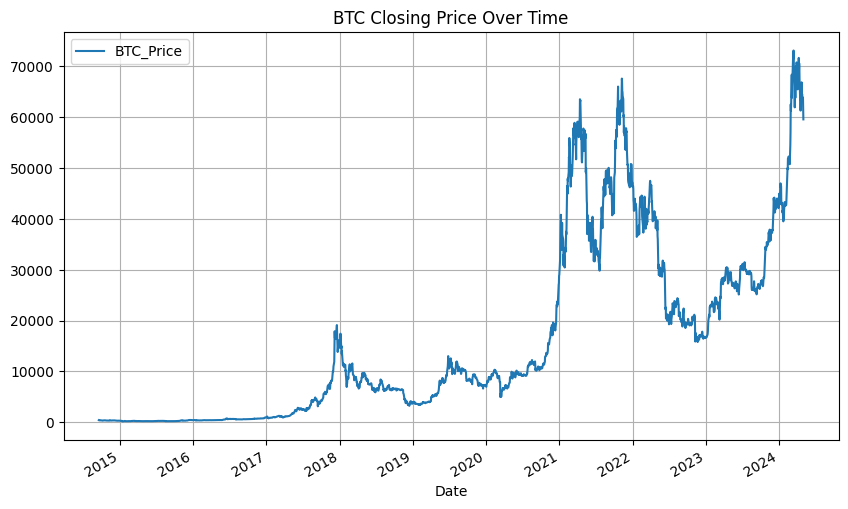

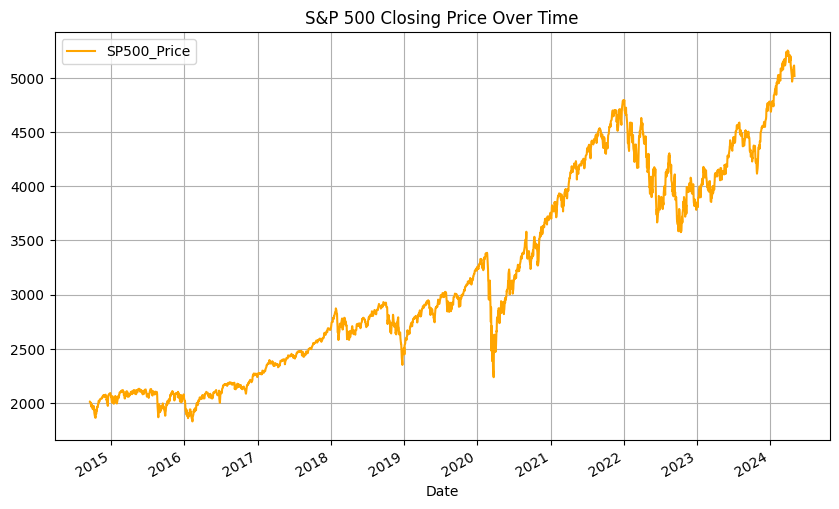

In [4]:
# BTC Closing Price
(
  btc_data.plot(
    x='Date', 
    y='BTC_Price', 
    title='BTC Closing Price Over Time', 
    figsize=(10, 6), 
    grid=True)
)
plt.show()

# S&P 500 Closing Price
(
  sp500_data.plot(
    x='Date', 
    y='SP500_Price', 
    title='S&P 500 Closing Price Over Time', 
    figsize=(10, 6), 
    color='orange', 
    grid=True)
)
plt.show()

#### Merging Datasets with the 4 columns needed for this EDA

In [5]:
# Select the relevant columns for each dataset
btc_selected = btc_data[['Date', 'BTC_Price', 'BTC_Volume']]
sp500_selected = sp500_data[['Date', 'SP500_Price', 'SP500_Volume']]

# Merge both datasets using the column 'Date'
merged_data = pd.merge(btc_selected, sp500_selected, on='Date')

# Set the 'Date' column as the index for easier resampling
merged_data.set_index('Date', inplace=True)

merged_data.to_csv('./Data/btc_sp500_price_volume_merged.csv')
merged_data

,BTC_Price,BTC_Volume,SP500_Price,SP500_Volume
Date,,,,
2014-09-18,424.440002,3.448320e+07,2011.359985,3235340000
2014-09-19,394.795990,3.791970e+07,2010.400024,4880220000
2014-09-22,402.152008,2.412760e+07,1994.290039,3349670000
2014-09-23,435.790985,4.509950e+07,1982.770020,3279350000
2014-09-24,423.204987,3.062770e+07,1998.300049,3313850000
...,...,...,...,...
2024-04-24,64276.898438,3.027666e+10,5071.629883,3656740000
2024-04-25,64481.707031,3.215579e+10,5048.419922,3958050000
2024-04-26,63755.320313,2.413937e+10,5099.959961,3604140000


#### Resample data to calculate: Total transacion volume and Prices for different intervals

In [ ]:
# Resample the data to calculate mean prices and total volumes for different intevals

# Price Analisis
weekly_data = merged_data.resample('W').mean() # Weekly average
monthly_data = merged_data.resample('ME').mean() # Montlhy average
quarterly_data = merged_data.resample('QE').mean() # Quarterly average
annual_data = merged_data.resample('YE').mean() # Annual average

# Function for resample, group and sum different volumes in different frequencies
def analyze_volume_by_frequency(data, freq):
    return data.resample(freq).agg({
        'BTC_Volume': 'sum',
        'SP500_Volume': 'sum'
    })

# Volume Analisis
weekly_volume = analyze_volume_by_frequency(merged_data, 'W')
monthly_volume = analyze_volume_by_frequency(merged_data, 'ME')
quarterly_volume = analyze_volume_by_frequency(merged_data, 'QE')
annual_volume = analyze_volume_by_frequency(merged_data, 'YE')

#### Plot the results to visualize trends for price and volumes

In [14]:
# Function for graph both prices and volumes
def plot_btc_sp500(
    data,                 # DataFrame con los datos
    y_column_btc,         # Columna para el valor de Bitcoin (precio o volumen)
    y_column_sp500,       # Columna para el valor del S&P 500 (precio o volumen)
    label_btc,            # Etiqueta para Bitcoin (e.g., 'Bitcoin Price', 'Bitcoin Volume')
    label_sp500,          # Etiqueta para S&P 500 (e.g., 'S&P 500 Price', 'S&P 500 Volume')
    title,                # Título de la gráfica
    ylabel,               # Etiqueta para el eje Y (e.g., 'Average Price', 'Transaction Volume')
    figsize=(12, 6)       # Tamaño de la figura
):
    plt.figure(figsize=figsize)
    plt.plot(data.index, data[y_column_btc], label=label_btc, alpha=0.8)
    plt.plot(data.index, data[y_column_sp500], label=label_sp500, alpha=0.8)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()


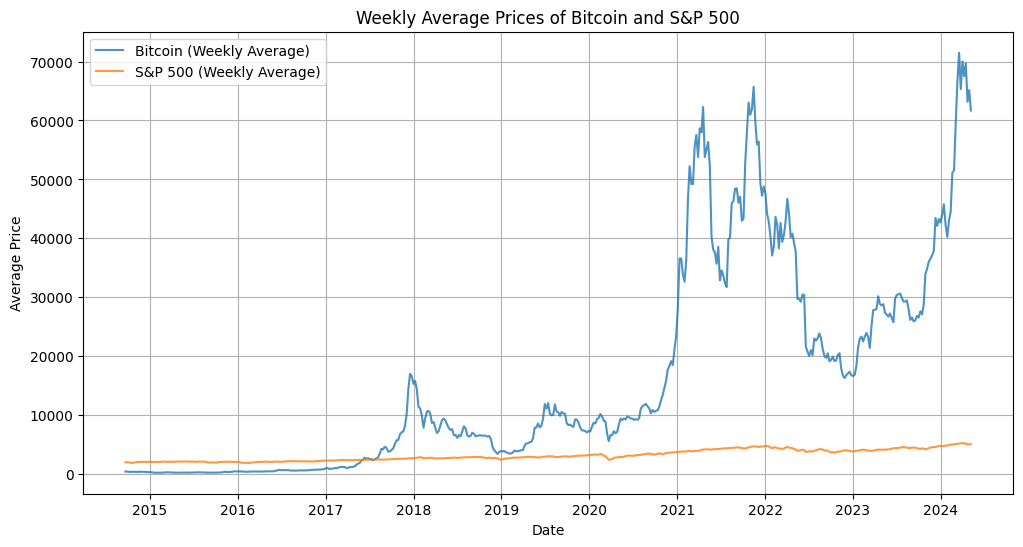

In [ ]:
# Weekly Trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['BTC_Price'], label='Bitcoin (Weekly Average)', alpha=0.8)
plt.plot(weekly_data.index, weekly_data['SP500_Price'], label='S&P 500 (Weekly Average)', alpha=0.8)
plt.title('Weekly Average Prices of Bitcoin and S&P 500')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

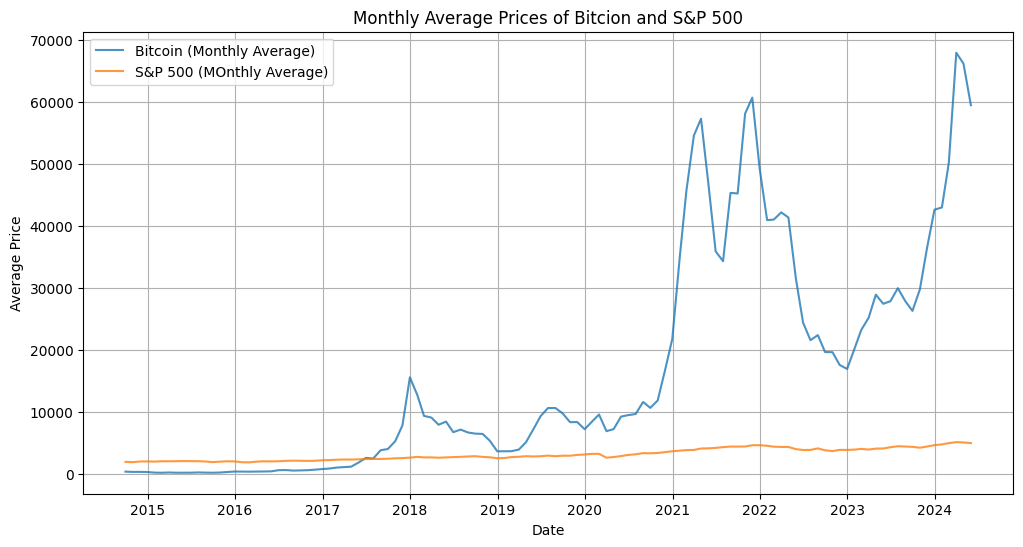

In [ ]:
# Monthly Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['BTC_Price'], label='Bitcoin (Monthly Average)', alpha=0.8)
plt.plot(monthly_data.index, monthly_data['SP500_Price'], label='S&P 500 (MOnthly Average)', alpha=0.8)
plt.title('Monthly Average Prices of Bitcion and S&P 500')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

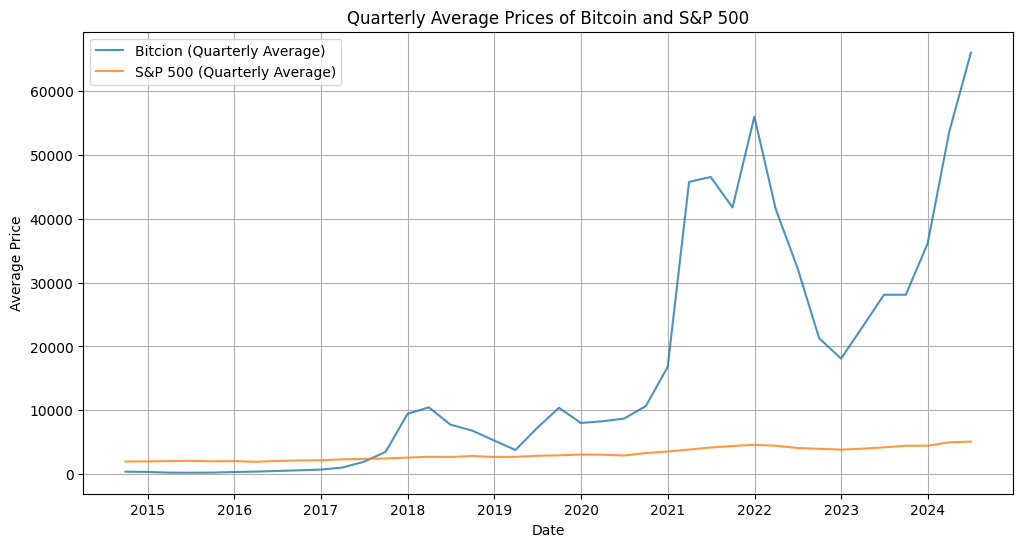

In [ ]:
# Quarterly trend
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data['BTC_Price'], label='Bitcion (Quarterly Average)', alpha=0.8)
plt.plot(quarterly_data.index, quarterly_data['SP500_Price'], label='S&P 500 (Quarterly Average)', alpha=0.8)
plt.title('Quarterly Average Prices of Bitcoin and S&P 500')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

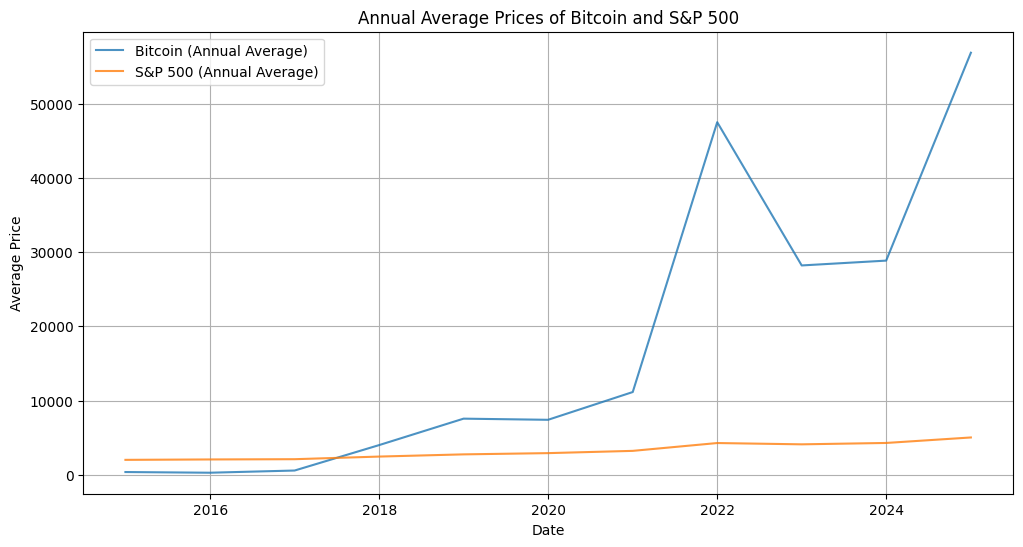

In [ ]:
# Annual Trend
plt.figure(figsize=(12, 6))
plt.plot(annual_data.index, annual_data['BTC_Price'], label='Bitcoin (Annual Average)', alpha=0.8)
plt.plot(annual_data.index, annual_data['SP500_Price'], label='S&P 500 (Annual Average)', alpha=0.8)
plt.title('Annual Average Prices of Bitcoin and S&P 500')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()